In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading in police csv
data = pd.read_csv('CCRB-Complaint-Data_202007271729/allegations_202007271729.csv', on_bad_lines='warn')

In [3]:
data.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [4]:
data.shape

(33358, 27)

In [5]:
data.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
fado_type                      0
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
board_disposition              0
dtype: int64

In [6]:
#to clean: month, year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   shield_no                 33358 non-null  int64  
 5   complaint_id              33358 non-null  int64  
 6   month_received            33358 non-null  int64  
 7   year_received             33358 non-null  int64  
 8   month_closed              33358 non-null  int64  
 9   year_closed               33358 non-null  int64  
 10  command_at_incident       31814 non-null  object 
 11  rank_abbrev_incident      33358 non-null  object 
 12  rank_abbrev_now           33358 non-null  object 
 13  rank_now                  33358 non-null  object 
 14  rank_i

In [7]:
#for column in ['month_received', 'year_received', 'month_closed', 'year_closed']:
#    data[column] = data[column].astype(str)

In [8]:
data['year_received'].unique()

array([2019, 2011, 2012, 2018, 2017, 2015, 2016, 2013, 2014, 2010, 2001,
       2002, 2007, 2003, 2004, 2005, 2006, 2008, 2009, 1997, 1999, 1996,
       2000, 1991, 1992, 1993, 1995, 1989, 1994, 1998, 1990, 1988, 1985,
       1986, 1987, 2020])

In [9]:
#some of the rows have the values out of order?
data[data['year_received'] == 'Police Officer']

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition


In [10]:
data[data['year_received'] == '201ted']

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition


In [11]:
#loading in glossary/reference sheets
#layout describes columns
#rank abbrevs describes officer types
#command abbrevs describes officer's command assignment
#FADO describes top-level category of complaint
#dispositions describes result of complaint
sheets = ["Layout", "Rank Abbrevs", "Command Abbrevs", 'FADO', 'Dispositions']
data_layout_table = {}
for sheet in sheets:
    data_layout_table['_'.join(sheet.split())] = pd.read_excel('CCRB-Complaint-Data_202007271729/CCRB Data Layout Table.xlsx', sheet_name=sheet)

Text(0, 0.5, 'Officer Count')

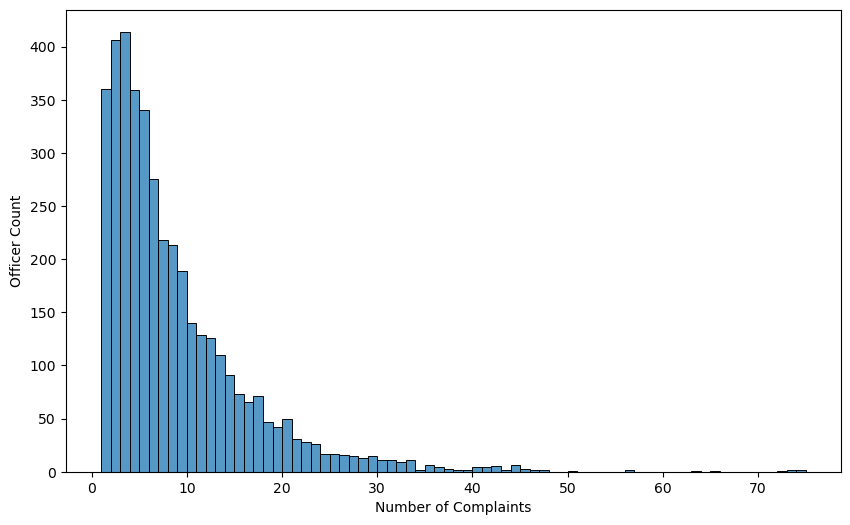

In [12]:
#histogram of number of complaints for a single officer
plt.figure(figsize=(10, 6))
ax = sns.histplot(x=data['unique_mos_id'].value_counts(), data=data)
ax.set_xlabel('Number of Complaints')
ax.set_ylabel('Officer Count')

Text(0, 0.5, 'Precinct(?) Count')

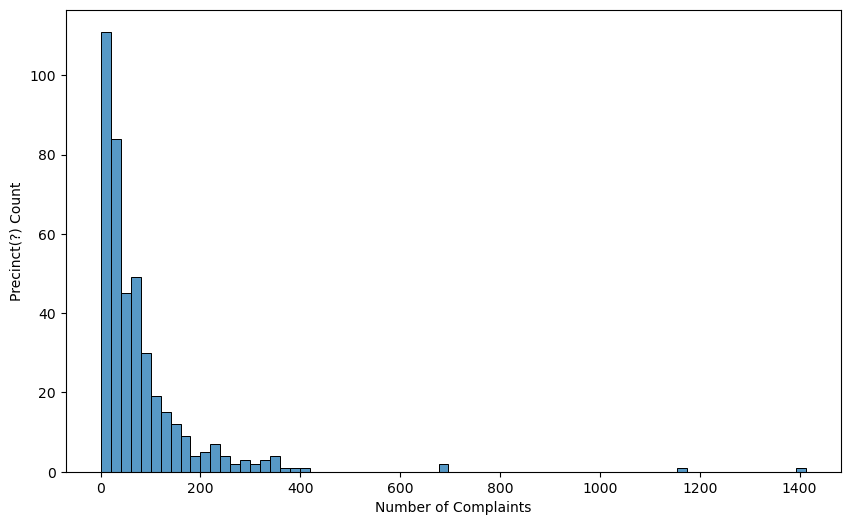

In [13]:
#histogram of number of complaints for a single precinct(?)
plt.figure(figsize=(10, 6))
ax = sns.histplot(x=data['command_now'].value_counts(), data=data)
ax.set_xlabel('Number of Complaints')
ax.set_ylabel('Precinct(?) Count')

In [14]:
command_now_over_1000 = data['command_now'].value_counts()[data['command_now'].value_counts() > 1000]
data_layout_table['Command_Abbrevs'][data_layout_table['Command_Abbrevs']['Abbreviation'].isin(command_now_over_1000.index)]


,Abbreviation,Command Name
1,WARRSEC,Warrant Section
18,INT CIS,Criminal Intelligence Section


<Axes: xlabel='fado_type', ylabel='count'>

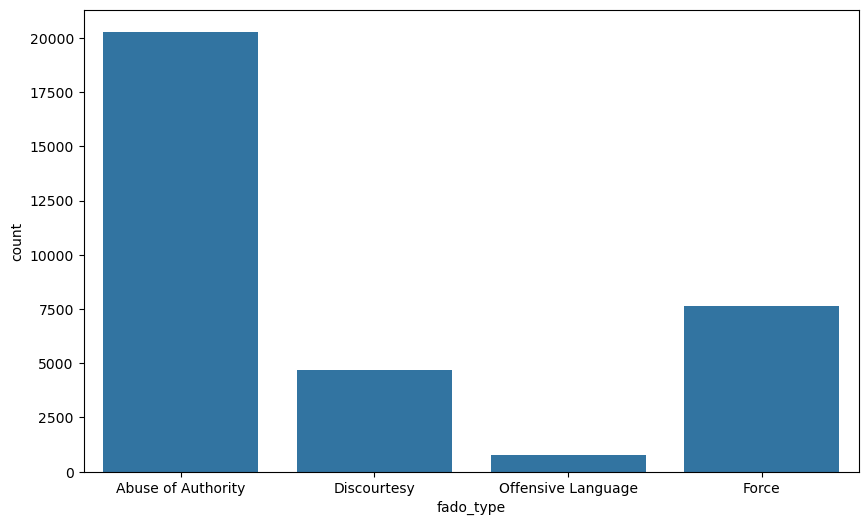

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fado_type', data=data)

In [16]:
data['allegation'].unique()

array(['Failure to provide RTKA card', 'Action', 'Race', 'Question',
       'Physical force', 'Refusal to process civilian complaint',
       'Sexual orientation', 'Word', 'Refusal to provide shield number',
       'Retaliatory summons', 'Refusal to provide name/shield number',
       'Search (of person)', 'Pepper spray', 'Handcuffs too tight',
       'Frisk', 'Vehicle stop', 'Vehicle search', 'Strip-searched',
       'Threat of arrest', 'Threat of force (verbal or physical)', 'Stop',
       'Refusal to obtain medical treatment',
       'Hit against inanimate object', 'Frisk and/or search', 'Other',
       'Question and/or stop', 'Premises entered and/or searched',
       'Gun Drawn', 'Nonlethal restraining device', 'Retaliatory arrest',
       'Seizure of property', 'Chokehold', 'Gender',
       'Nightstick as club (incl asp & baton)', 'Refusal to provide name',
       'Gun Pointed', 'Threat to notify ACS',
       'Other blunt instrument as a club', 'Property damaged',
       'Interfe

In [17]:
#some of the most common allegations
allegation_counts = data['allegation'].value_counts()
allegation_counts[allegation_counts > 1000]

allegation
Physical force                           4849
Word                                     3942
Stop                                     2300
Search (of person)                       2047
Frisk                                    1926
Premises entered and/or searched         1555
Refusal to provide name/shield number    1483
Vehicle search                           1405
Threat of arrest                         1370
Vehicle stop                             1094
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='allegation'>

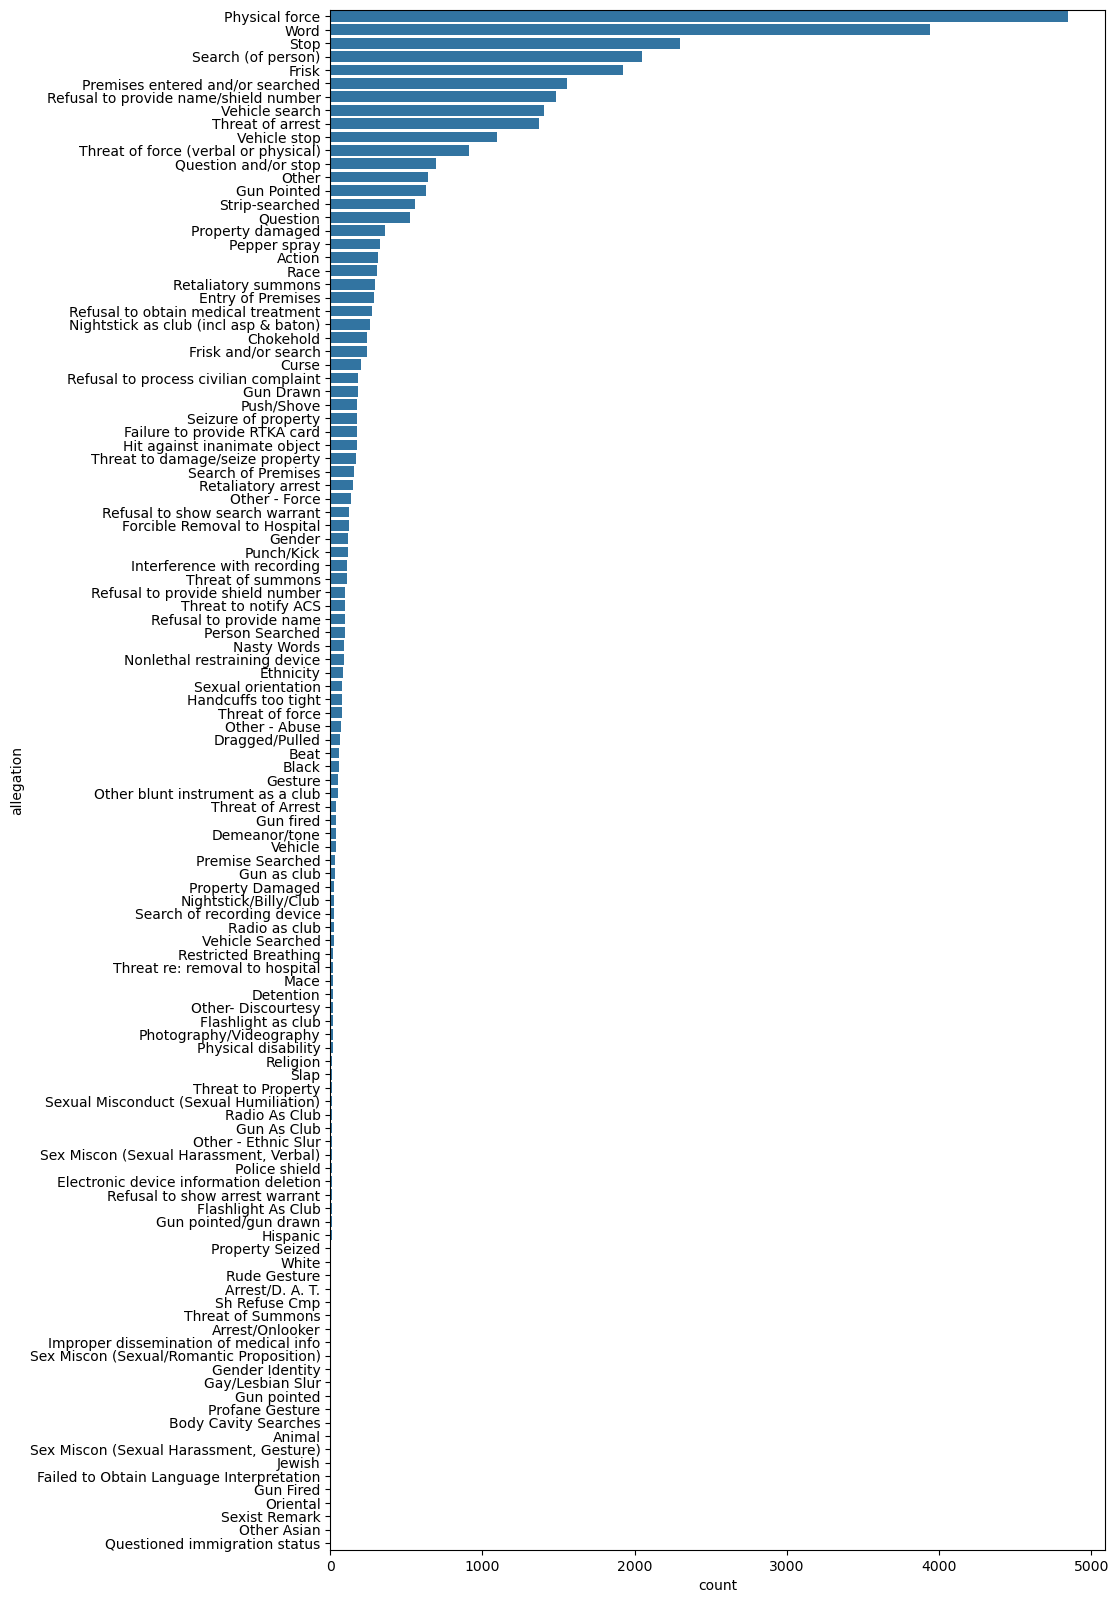

In [18]:
#uncomment to see allegation countplot sorted in descending order
plt.figure(figsize=(10, 20))
allegation_order = data['allegation'].value_counts().index
sns.countplot(y='allegation', data=data, order=allegation_order)

## **AMY'S GRAPHS** ##

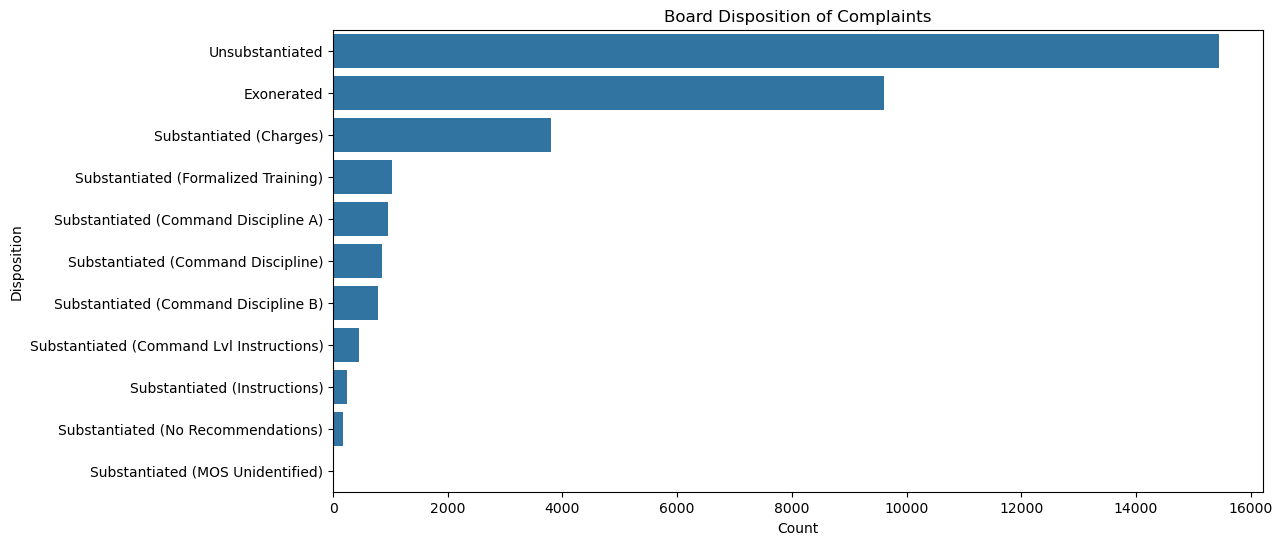

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(
    y='board_disposition',
    data=data,
    order=data['board_disposition'].value_counts().index
)
plt.title('Board Disposition of Complaints')
plt.xlabel('Count')
plt.ylabel('Disposition')
plt.show()


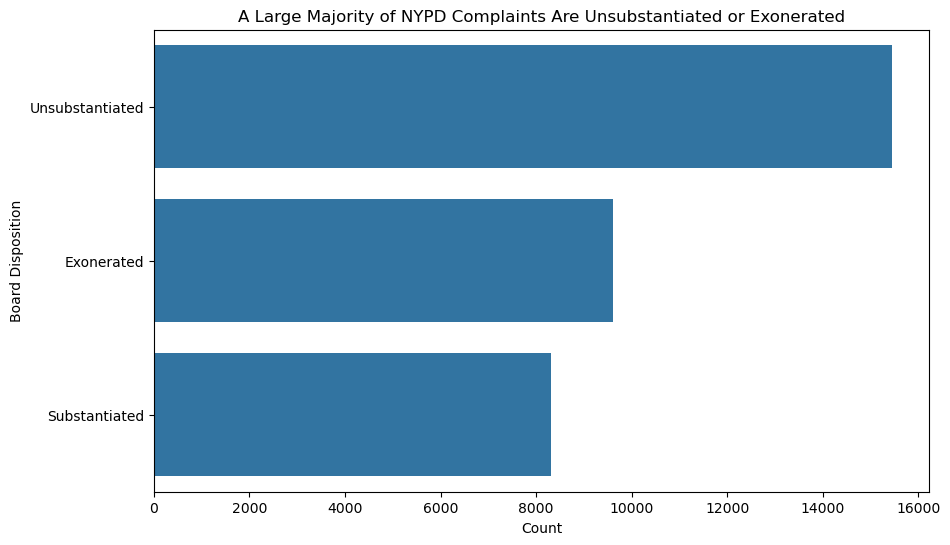

In [10]:
import re

def simplify_disposition(x):
    x = str(x).lower()
    if re.search(r'\bsubstantiated\b', x):
        return 'Substantiated'
    elif re.search(r'\bunsubstantiated\b', x):
        return 'Unsubstantiated'
    else:
        return x.title() 

data['board_disposition_simple'] = data['board_disposition'].apply(simplify_disposition)

plt.figure(figsize=(10,6))
sns.countplot(y='board_disposition_simple', data=data,
              order=data['board_disposition_simple'].value_counts().index)
plt.title('A Large Majority of NYPD Complaints Are Unsubstantiated or Exonerated')
plt.xlabel('Count')
plt.ylabel('Board Disposition')
plt.show()


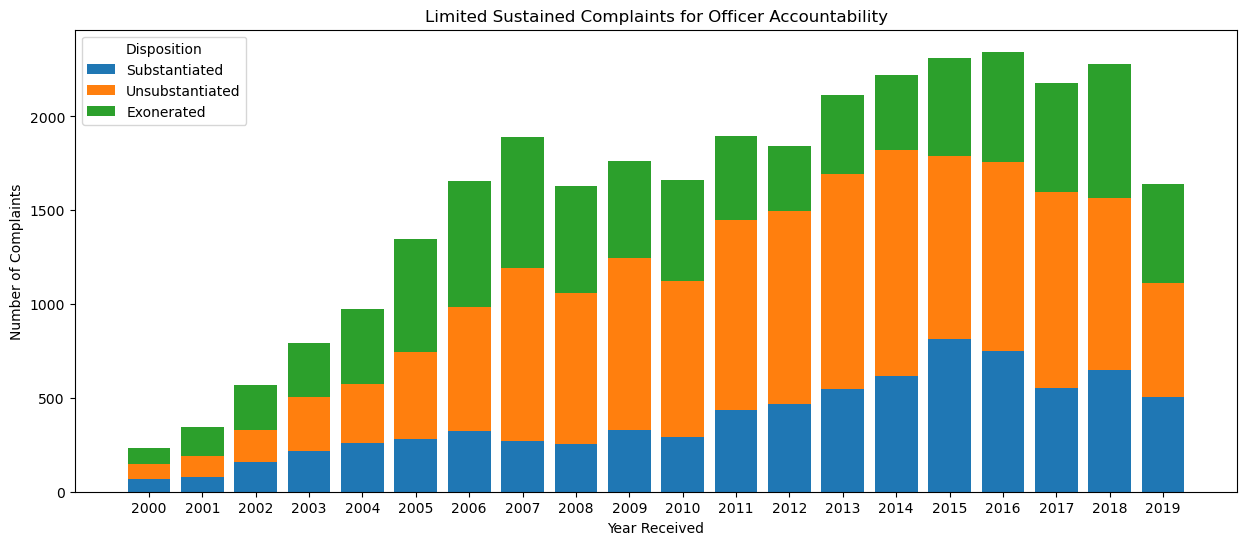

In [11]:
data_filtered = data[(data['year_received'] >= 2000) & (data['year_received'] <= 2019)]
yearly_counts = data_filtered.pivot_table(
    index='year_received',
    columns='board_disposition_simple',
    values='complaint_id', 
    aggfunc='count',
    fill_value=0
).reset_index()

yearly_counts
categories = ['Substantiated', 'Unsubstantiated', 'Exonerated']

plt.figure(figsize=(15,6))
bottom = pd.Series([0]*len(yearly_counts))

for cat in categories:
    if cat in yearly_counts.columns:
        plt.bar(
            yearly_counts['year_received'],
            yearly_counts[cat],
            bottom=bottom,
            label=cat
        )
        bottom += yearly_counts[cat]  

plt.xticks(range(2000, 2020))
plt.xlabel('Year Received')
plt.ylabel('Number of Complaints')
plt.title('Limited Sustained Complaints for Officer Accountability')
plt.legend(title='Disposition')
plt.show()


### Vanessa

In [138]:
data['board_disposition'].unique().tolist()

['Substantiated (Command Lvl Instructions)',
 'Substantiated (Charges)',
 'Substantiated (Command Discipline A)',
 'Substantiated (Formalized Training)',
 'Unsubstantiated',
 'Exonerated',
 'Substantiated (Command Discipline B)',
 'Substantiated (Instructions)',
 'Substantiated (Command Discipline)',
 'Substantiated (No Recommendations)',
 'Substantiated (MOS Unidentified)']

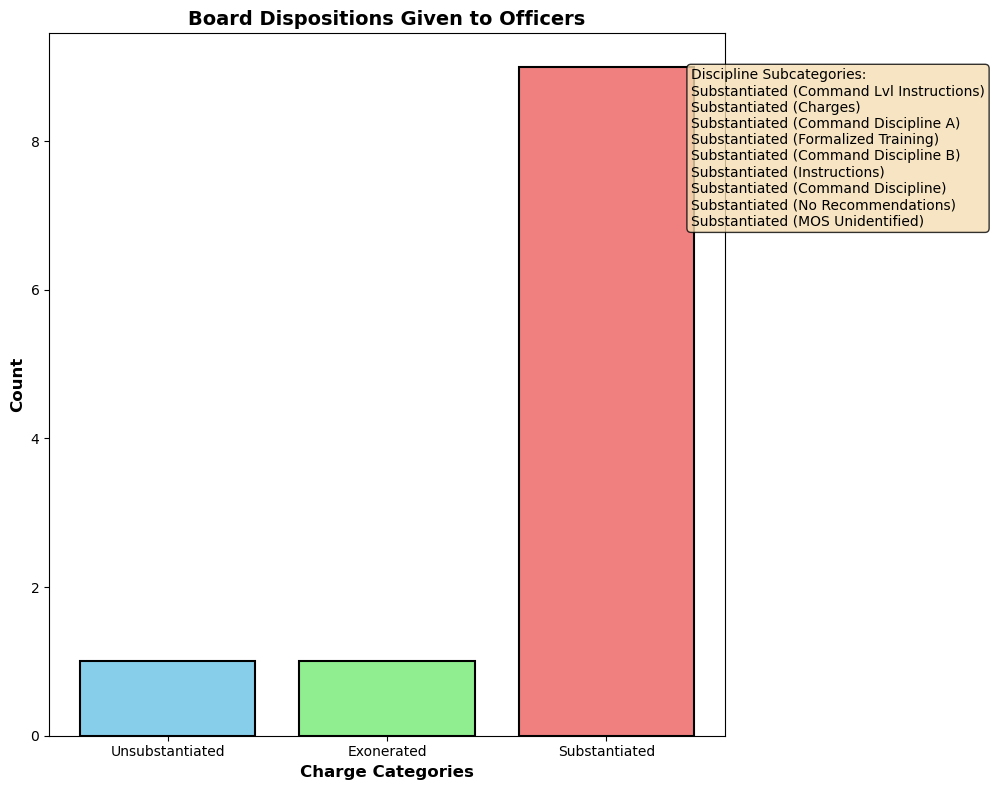

In [136]:
type_counts = {'Unsubstantiated':0, 'Exonerated':0, 'Substantiated':0}
for x in data['board_disposition'].unique().tolist():
    for cat in type_counts:
        if cat in x:
            type_counts[cat] += 1

substantiated_subcats = [x for x in data['board_disposition'].unique().tolist() if 'Substantiated' in x]

fig, ax = plt.subplots(figsize=(10, 8))

categories = list(type_counts.keys())
heights = list(type_counts.values())
colors = ['skyblue', 'lightgreen', 'lightcoral']

bars = ax.bar(categories, heights, color=colors, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xlabel('Charge Categories', fontsize=12, fontweight='bold')
ax.set_title('Board Dispositions Given to Officers', fontsize=14, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    

# Add text annotation for substantiated types
ax.text(0.95, 0.95, f'Discipline Subcategories:\n' + '\n'.join(substantiated_subcats),
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

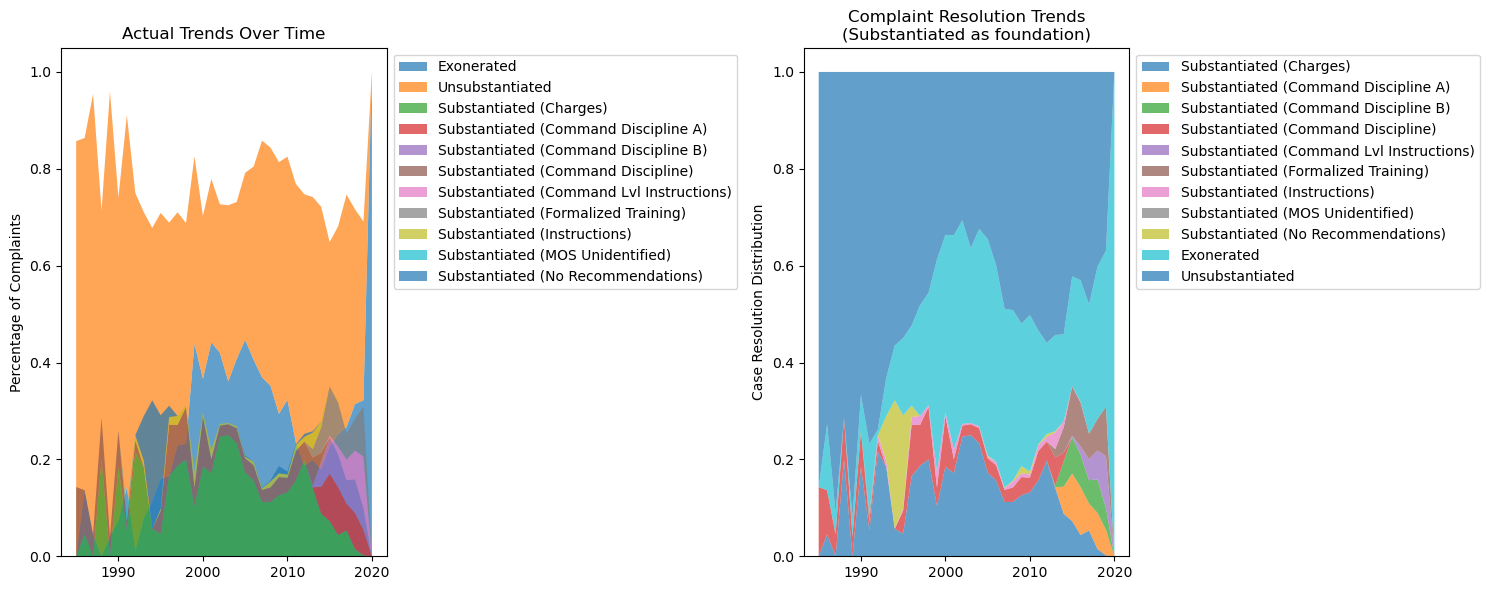

In [141]:
# Create time-series data that shows substantiated growing
# If you have date information:
test=data.copy()
test['year_received'] = pd.to_datetime(data['year_received']).dt.year

yearly_disposition = test.groupby(['year_received', 'board_disposition']).size().unstack(fill_value=0)

# Normalize to percentages but apply smoothing to show substantiated trend
yearly_percent = yearly_disposition.div(yearly_disposition.sum(axis=1), axis=0)

# Apply selective smoothing - smooth down non-substantiated, smooth up substantiated
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Truthful
substantiated_cols = [col for col in yearly_percent.columns if 'Substantiated' in col]
non_substantiated_cols = [col for col in yearly_percent.columns if 'Substantiated' not in col]

ax1.stackplot(yearly_percent.index, 
             yearly_percent[non_substantiated_cols].T.values,
             labels=non_substantiated_cols,
             alpha=0.7)
ax1.stackplot(yearly_percent.index, 
             yearly_percent[substantiated_cols].T.values,
             labels=substantiated_cols,
             alpha=0.7)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('Actual Trends Over Time')
ax1.set_ylabel('Percentage of Complaints')

# Deceptive - use area chart with substantiated on bottom (appears larger)
deceptive_data = yearly_percent.copy()
# Reorder so substantiated is at the bottom (appears as foundation)
column_order = substantiated_cols + non_substantiated_cols
deceptive_data = deceptive_data[column_order]

ax2.stackplot(deceptive_data.index, 
             [deceptive_data[col] for col in deceptive_data.columns],
             labels=deceptive_data.columns,
             alpha=0.7)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('Complaint Resolution Trends\n(Substantiated as foundation)')
ax2.set_ylabel('Case Resolution Distribution')

plt.tight_layout()
plt.show()

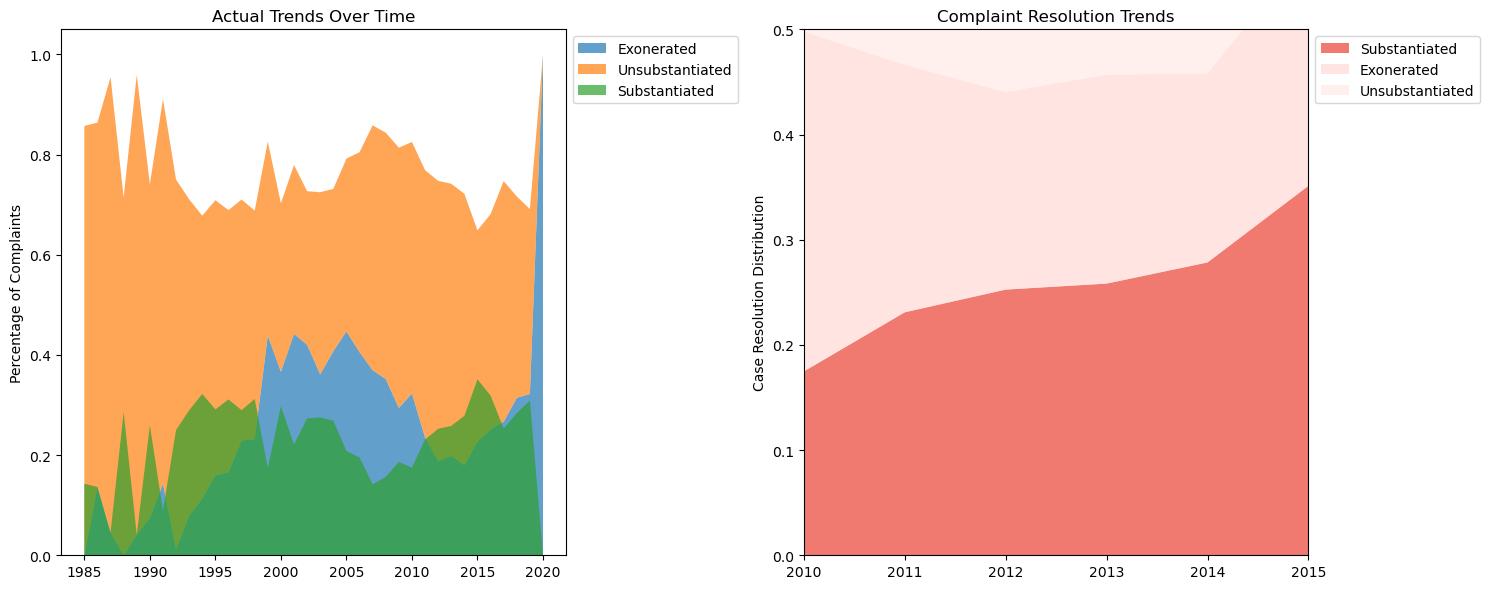

In [162]:
test=data.copy()
test['year_received'] = pd.to_datetime(data['year_received']).dt.year

yearly_disposition = test.groupby(['year_received', 'board_disposition_simple']).size().unstack(fill_value=0)

yearly_percent = yearly_disposition.div(yearly_disposition.sum(axis=1), axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Truthful
substantiated_cols = [col for col in yearly_percent.columns if 'Substantiated' in col]
non_substantiated_cols = [col for col in yearly_percent.columns if 'Substantiated' not in col]

ax1.stackplot(yearly_percent.index, 
             yearly_percent[non_substantiated_cols].T.values,
             labels=non_substantiated_cols,
             alpha=0.7)
ax1.stackplot(yearly_percent.index, 
             yearly_percent[substantiated_cols].T.values,
             labels=substantiated_cols,
             alpha=0.7)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_title('Actual Trends Over Time')
ax1.set_ylabel('Percentage of Complaints')

# Deceptive - use area chart with substantiated on bottom (appears larger)
deceptive_data = yearly_percent.copy()
column_order = substantiated_cols + non_substantiated_cols
deceptive_data = deceptive_data[column_order]

ax2.stackplot(deceptive_data.index, 
             [deceptive_data[col] for col in deceptive_data.columns],
             labels=deceptive_data.columns,
              colors=['#eb4034', '#ffd9d6', '#ffeae8'],
             alpha=0.7)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('Complaint Resolution Trends')
ax2.set_ylabel('Case Resolution Distribution')
ax2.set_xlim(left=2010, right=2015)
ax2.set_ylim(bottom=0, top=0.5)

plt.tight_layout()
plt.show()